# Download any OSM Geospatial Entities with OSMnx

Bu not defteri, OpenStreetMap'ten herhangi bir jeo-uzamsal varlığı/nesneyi jeopanda GeoDataFrame olarak indirmek için OSMnx'i kullanma konusunda hızlılık tur sağlar.

In [1]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

In [2]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Civic Center, Los Angeles, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(109, 67)

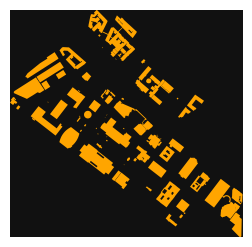

In [3]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [4]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"leisure": "park"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(2, 5)

In [5]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Piedmont, California, USA", tags)
gdf.shape

(141, 62)

In [6]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")


amenity             name  \
element_type osmid                                 
node         2810181540    bank         Citibank   
way          276424028     bank  Bank of America   
             285549437     bank      Wells Fargo   

                                                                  geometry  \
element_type osmid                                                           
node         2810181540                        POINT (-122.23256 37.82515)   
way          276424028   POLYGON ((-122.23259 37.82492, -122.23252 37.8...   
             285549437   POLYGON ((-122.23148 37.82467, -122.23133 37.8...   

                                   brand brand:wikidata     brand:wikipedia  
element_type osmid                                                           
node         2810181540         Citibank        Q857063         en:Citibank  
way          276424028   Bank of America        Q487907  en:Bank of America  
             285549437       Wells Fargo        Q744149      en:Wells Fargo

In [7]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

name  \
element_type osmid                                            
node         4071030440  Park Boulevard & Saint James Drive   
             5845148873     Hampton Road & Sandringham Road   
             5845152990     Hampton Road & Sandringham Road   
             5845153014       Hampton Road & Seaview Avenue   
             5845153034       Hampton Road & Seaview Avenue   

                                            geometry  bus   highway  \
element_type osmid                                                    
node         4071030440  POINT (-122.21517 37.81248)  yes  bus_stop   
             5845148873  POINT (-122.21492 37.81822)  yes  bus_stop   
             5845152990  POINT (-122.21459 37.81818)  yes  bus_stop   
             5845153014  POINT (-122.22303 37.81763)  yes  bus_stop   
             5845153034  POINT (-122.22265 37.81779)  yes  bus_stop   

                            network public_transport    ref route_ref  
element_type osmid                                                     
node         4071030440  AC Transit         platform  57544  V;33;688  
             5845148873  AC Transit         platform  53832        33  
             5845152990  AC Transit         platform  50830        33  
             5845153014  AC Transit         platform  53865        33  
             5845153034  AC Transit         platform  53238        33